## Smoothing Techniques in Time Series with FB data

In [72]:
## Importing all required libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing

In [73]:
import os
print(os.getcwd())
import warnings
warnings.filterwarnings("ignore")

F:\Python Learning\Imarticus\Projects\Time Series


In [74]:
df = pd.read_csv("FB.csv", parse_dates=['Date'], index_col=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2014-12-08 to 2019-12-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [75]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [77]:
df_close = df['Close']

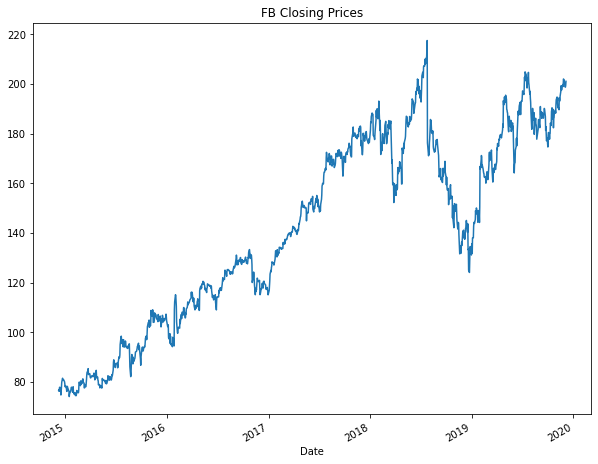

In [78]:
plt.figure(figsize=(10,8))
df_close.plot()
plt.title("FB Closing Prices")
plt.show()

### Creating required data

In [79]:
df_close.tail(30)

Date
2019-10-25    187.889999
2019-10-28    189.399994
2019-10-29    189.309998
2019-10-30    188.250000
2019-10-31    191.649994
2019-11-01    193.619995
2019-11-04    194.720001
2019-11-05    194.320007
2019-11-06    191.550003
2019-11-07    190.419998
2019-11-08    190.839996
2019-11-11    189.610001
2019-11-12    194.470001
2019-11-13    193.190002
2019-11-14    193.149994
2019-11-15    195.100006
2019-11-18    197.399994
2019-11-19    199.320007
2019-11-20    197.509995
2019-11-21    197.929993
2019-11-22    198.820007
2019-11-25    199.789993
2019-11-26    198.970001
2019-11-27    202.000000
2019-11-29    201.639999
2019-12-02    199.699997
2019-12-03    198.820007
2019-12-04    198.710007
2019-12-05    199.360001
2019-12-06    201.050003
Name: Close, dtype: float64

In [81]:
testclose = df_close.iloc[-30:]
trainclose = df_close.iloc[:-30] 
print(f"Train Shape: {trainclose.shape}; Test Shape: {testclose.shape}")

Train Shape: (1229,); Test Shape: (30,)


In [82]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

In [83]:
def timeseries_evaluation_metrics(y_true, y_pred):
    print('Evaluation metric results: ')
    print(f'MSE value : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE value : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE value : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE value : {MAPE(y_true, y_pred)}')
    print(f'R2 score : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

### Simple Exponential Smoothing Function

In [85]:
testclose

Date
2019-10-25    187.889999
2019-10-28    189.399994
2019-10-29    189.309998
2019-10-30    188.250000
2019-10-31    191.649994
2019-11-01    193.619995
2019-11-04    194.720001
2019-11-05    194.320007
2019-11-06    191.550003
2019-11-07    190.419998
2019-11-08    190.839996
2019-11-11    189.610001
2019-11-12    194.470001
2019-11-13    193.190002
2019-11-14    193.149994
2019-11-15    195.100006
2019-11-18    197.399994
2019-11-19    199.320007
2019-11-20    197.509995
2019-11-21    197.929993
2019-11-22    198.820007
2019-11-25    199.789993
2019-11-26    198.970001
2019-11-27    202.000000
2019-11-29    201.639999
2019-12-02    199.699997
2019-12-03    198.820007
2019-12-04    198.710007
2019-12-05    199.360001
2019-12-06    201.050003
Name: Close, dtype: float64

In [80]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [84]:
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    fit_v = SimpleExpSmoothing(np.asarray(trainclose)).fit(i)
    fcst_pred_v= fit_v.forecast(len(testclose))   
    rmse = np.sqrt(metrics.mean_squared_error(testclose, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']) 

,smoothing parameter,RMSE
10,1.0,9.878157
9,0.9,9.926882
8,0.8,10.008074
4,0.4,10.087624
7,0.7,10.088978
3,0.3,10.090519
5,0.5,10.136144
6,0.6,10.139199
2,0.2,10.432890
1,0.1,11.410474


Let us build the model with Smoothing level = 1 based on the above results.

In [88]:
SES = SimpleExpSmoothing(np.asarray(trainclose))
fit_SES = SES.fit(smoothing_level = 1, optimized=False)
fcst_gs_pred = fit_SES.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_gs_pred)

Evaluation metric results: 
MSE value : 97.57797868071496
MAE value : 8.90366143333332
RMSE value : 9.878156643864024
MAPE value : 4.513333762437967
R2 score : -4.331316662144517



In [12]:
fit_SES.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8968.966
Optimized:,False,AIC,2446.723
Trend:,None,BIC,2456.951
Seasonal:,None,AICC,2446.756
Seasonal Periods:,None,Date:,"Wed, 02 Nov 2022"
Box-Cox:,False,Time:,04:30:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,76.519997,l.0,False


Let us build the model with optimized = True without any smoothing parameter.

In [13]:
SES = SimpleExpSmoothing(np.asarray(trainclose))
fit_SES_auto = SES.fit(optimized= True, use_brute = True)
fcst_auto_pred = fit_SES_auto.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_auto_pred) 

Evaluation metric results: 
MSE value : 97.68044584565055
MAE value : 8.909413790163907
RMSE value : 9.883341835920204
MAPE value : 4.516280824150738
R2 score : -4.336915106702702



In [14]:
fit_SES_auto.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Wed, 02 Nov 2022"
Box-Cox:,False,Time:,04:30:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808445,alpha,True
initial_level,76.525896,l.0,True


In [89]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred

,Close_grid_Search
0,186.380005
1,186.380005
2,186.380005
3,186.380005
4,186.380005
5,186.380005
6,186.380005
7,186.380005
8,186.380005
9,186.380005


In [91]:
df_fcst_gs_pred["new_index"] = testclose.index
df_fcst_gs_pred

,Close_grid_Search,new_index
0,186.380005,2019-10-25
1,186.380005,2019-10-28
2,186.380005,2019-10-29
3,186.380005,2019-10-30
4,186.380005,2019-10-31
5,186.380005,2019-11-01
6,186.380005,2019-11-04
7,186.380005,2019-11-05
8,186.380005,2019-11-06
9,186.380005,2019-11-07


In [92]:
##For grid search model-

df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = testclose.index
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index") 

In [93]:
df_fcst_gs_pred.head()

,Close_grid_Search
new_index,
2019-10-25,186.380005
2019-10-28,186.380005
2019-10-29,186.380005
2019-10-30,186.380005
2019-10-31,186.380005


In [95]:
#For automatic model-

df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = testclose.index
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index") 
df_fcst_auto_pred

,Close_auto_search
new_index,
2019-10-25,186.374253
2019-10-28,186.374253
2019-10-29,186.374253
2019-10-30,186.374253
2019-10-31,186.374253
2019-11-01,186.374253
2019-11-04,186.374253
2019-11-05,186.374253
2019-11-06,186.374253


In [98]:
df_fcst_simp_exp_smooth = df_fcst_gs_pred.copy(deep=True)
df_fcst_simp_exp_smooth

,Close_grid_Search
new_index,
2019-10-25,186.380005
2019-10-28,186.380005
2019-10-29,186.380005
2019-10-30,186.380005
2019-10-31,186.380005
2019-11-01,186.380005
2019-11-04,186.380005
2019-11-05,186.380005
2019-11-06,186.380005


In [99]:
df_fcst_simp_exp_smooth['Close_auto_pred'] = fcst_auto_pred
df_fcst_simp_exp_smooth

,Close_grid_Search,Close_auto_pred
new_index,,
2019-10-25,186.380005,186.374253
2019-10-28,186.380005,186.374253
2019-10-29,186.380005,186.374253
2019-10-30,186.380005,186.374253
2019-10-31,186.380005,186.374253
2019-11-01,186.380005,186.374253
2019-11-04,186.380005,186.374253
2019-11-05,186.380005,186.374253
2019-11-06,186.380005,186.374253


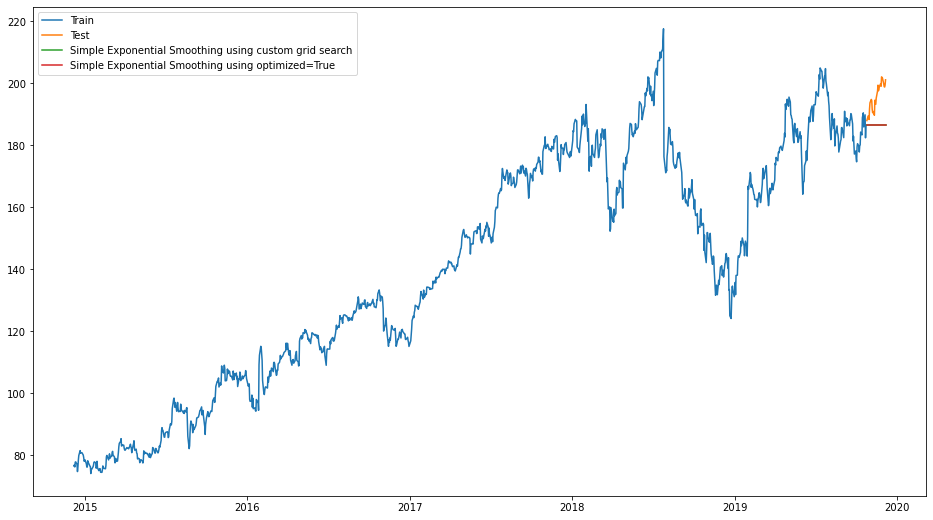

In [103]:
#Making the trend plot for entire series.

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainclose, label='Train')
plt.plot(testclose, label='Test')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized=True')
plt.legend(loc='best')
plt.show() 

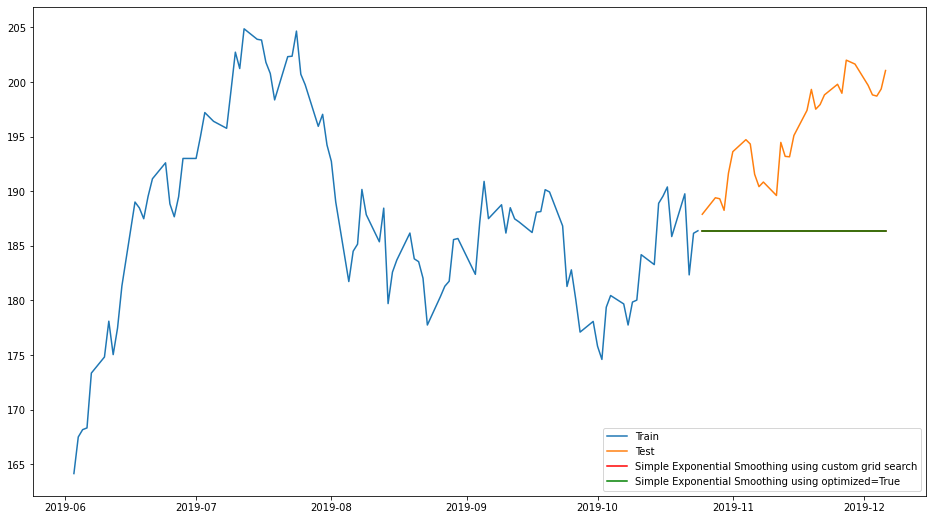

In [106]:
#Making the trend plot for entire series.

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainclose["2019-06":], label='Train')
plt.plot(testclose, label='Test')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search', color='red')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized=True', color='green')
plt.legend(loc='best')
plt.show() 

From the above graph, we can see the Simple Exponential Smoothing is not predicting properly when compared to actual data.

## Double Exponential Smoothing (Only with Trend)

In [107]:
np.array(range(1, 10))/10.0

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [20]:
param_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid_DES = {'smoothing_level': param_values,
                  'smoothing_slope':param_values,
                  'damping_slope': param_values,
                  'damped': [True, False]}
pg_DES = list(ParameterGrid(param_grid_DES))

In [32]:
for a, b in enumerate(pg_DES):
    print(f'A: {a}, B:{b}')


A: 0, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.1}
A: 1, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.2}
A: 2, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.3}
A: 3, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.4}
A: 4, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.5}
A: 5, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.6}
A: 6, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.7}
A: 7, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.8}
A: 8, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.9}
A: 9, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.2, 'smoothing_slope': 0.1}
A: 10, B:{'damped': True, 'damping_slope': 0.1, 's

In [108]:
df_results_DES = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope', 'damped', 'RMSE','R²'])
for a,b in enumerate(pg_DES):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    fit_Holt = Holt(trainclose, damped=damped).fit(smoothing_level=smoothing_level, 
                                                   smoothing_slope=smoothing_slope, damping_slope=damping_slope, optimized=False)
    fcst_gs_pred_Holt = fit_Holt.forecast(len(testclose))
    df_pred = pd.DataFrame(fcst_gs_pred_Holt, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(testclose, df_pred.Forecasted_result))
    r2 = metrics.r2_score(testclose, df_pred.Forecasted_result)
    df_results_DES = df_results_DES.append({'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope, 
                                            'damping_slope':damping_slope, 'damped':damped, 'RMSE':RMSE, 'R²':r2}, ignore_index=True)
df_results_DES.sort_values(by=['RMSE','R²']).head(10) 

,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,R²
806,0.9,0.6,0.1,False,2.176486,0.741182
887,0.9,0.6,0.2,False,2.176486,0.741182
968,0.9,0.6,0.3,False,2.176486,0.741182
1049,0.9,0.6,0.4,False,2.176486,0.741182
1130,0.9,0.6,0.5,False,2.176486,0.741182
1211,0.9,0.6,0.6,False,2.176486,0.741182
1292,0.9,0.6,0.7,False,2.176486,0.741182
1373,0.9,0.6,0.8,False,2.176486,0.741182
1454,0.9,0.6,0.9,False,2.176486,0.741182
789,0.7,0.7,0.1,False,2.493706,0.660239


In [ ]:
df_results_DES = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope', 'damped', 'RMSE','R²'])
for a,b in enumerate(pg_DES):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    local_dict = b
    fit_Holt = Holt(trainclose, damped=damped).fit(smoothing_level=smoothing_level, 
                                                   moothing_slope=smoothing_slope, damping_slope=damping_slope, optimized=False)
    fcst_gs_pred_Holt = fit_Holt.forecast(len(testclose))
    df_pred = pd.DataFrame(fcst_gs_pred_Holt, columns=['Forecasted_result'])
    local_dict['RMSE'] = np.sqrt(metrics.mean_squared_error(testclose, df_pred.Forecasted_result))
    local_dict['r2'] = metrics.r2_score(testclose, df_pred.Forecasted_result)
    df_results_DES = df_results_DES.append(local_dict, ignore_index=True)
df_results_DES.sort_values(by=['RMSE','R²']).head(10) 

In [38]:
## Selecting the best parameter
best_params = df_results_DES.iloc[df_results_DES.sort_values(by=['RMSE','R²']).head(1).index, :4]
best_params

,smoothing_level,smoothing_slope,damping_slope,damped
806,0.9,0.6,0.1,False


In [36]:
best_params['damped']

False

In [114]:
## Building the model with best parameters
DES = Holt(trainclose,damped=best_params['damped'])
fit_Holt = DES.fit(smoothing_level=best_params['smoothing_level'], smoothing_slope=best_params['smoothing_slope'], 
                    damping_slope=best_params['damping_slope'] ,optimized=False)
fcst_gs_pred_Holt = fit_Holt.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_gs_pred_Holt)

Evaluation metric results: 
MSE value : 8.82036505003748
MAE value : 2.445202366104547
RMSE value : 2.969909939718287
MAPE value : 1.2499601423581082
R2 score : 0.5180863572576166



In [115]:
df_fcst_gs_holt = pd.DataFrame(fcst_gs_pred_Holt, columns=['Close_GS_Holt'])
df_fcst_gs_holt["new_index"] = testclose.index
df_fcst_gs_holt = df_fcst_gs_holt.set_index("new_index") 
df_fcst_gs_holt.head()

,Close_GS_Holt
new_index,
2019-10-25,185.660160
2019-10-28,186.168648
2019-10-29,186.677135
2019-10-30,187.185623
2019-10-31,187.694110


In [116]:
## Automatic Model
DES = Holt(trainclose)
fit_Holt_auto = DES.fit(optimized= True, use_brute = True)
fcst_auto_pred_Holt = fit_Holt_auto.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_auto_pred_Holt)

Evaluation metric results: 
MSE value : 69.5097411425215
MAE value : 7.5215632357603734
RMSE value : 8.337250214700378
MAPE value : 3.8131031231473997
R2 score : -2.79776714116048



In [121]:
fcst_auto_future_pred = fit_Holt.forecast(30)

In [123]:
fcst_auto_future_pred.head()

1229    185.660160
1230    186.168648
1231    186.677135
1232    187.185623
1233    187.694110
dtype: float64

In [111]:
fit_Holt_auto.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,Holt,SSE,8955.547
Optimized:,True,AIC,2448.883
Trend:,Additive,BIC,2469.339
Seasonal:,None,AICC,2448.952
Seasonal Periods:,None,Date:,"Wed, 02 Nov 2022"
Box-Cox:,False,Time:,12:07:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9796491,alpha,True
smoothing_trend,1.2165e-16,beta,True


In [117]:
df_fcst_auto_holt = pd.DataFrame(fcst_auto_pred_Holt, columns=['Close_Auto_Holt'])
df_fcst_auto_holt["new_index"] = testclose.index
df_fcst_auto_holt = df_fcst_auto_holt.set_index("new_index") 
df_fcst_auto_holt.head()

,Close_Auto_Holt
new_index,
2019-10-25,186.465114
2019-10-28,186.554561
2019-10-29,186.644009
2019-10-30,186.733456
2019-10-31,186.822904


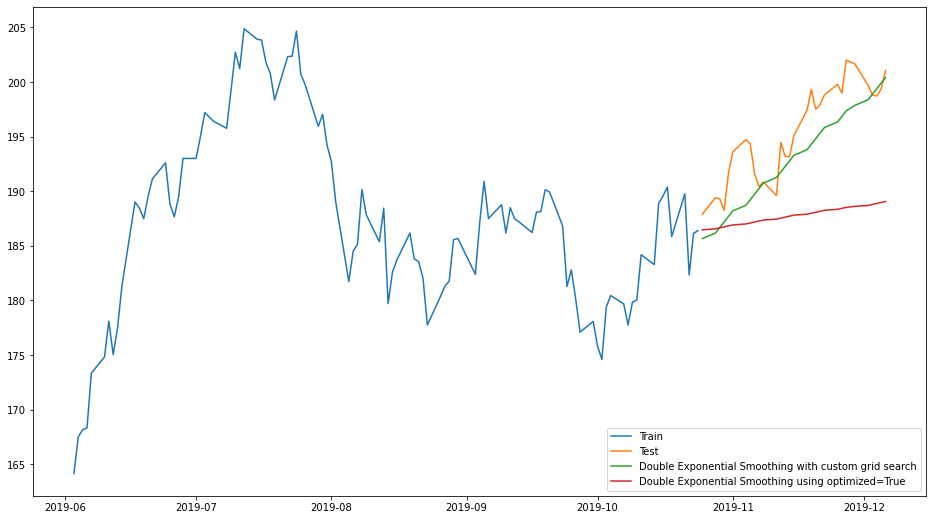

In [118]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainclose["2019-06":,], label='Train')
plt.plot(testclose, label='Test')
plt.plot(df_fcst_gs_holt, label='Double Exponential Smoothing with custom grid search')
plt.plot(df_fcst_auto_holt, label='Double Exponential Smoothing using optimized=True')
plt.legend(loc='best')
plt.show() 

## Triple Exponential Smoothing (With Trend and Seasonality)

In [124]:
param_grid_TES = {'trend': ['add', 'mul'], 'seasonal' :['add', 'mul'],
                   'seasonal_periods':[3,6,12], 
                   'smoothing_level': [.20, .40, .60, .80],  # extended search grid: [.10,.20,.30,.40,.50,.60,.70,.80,.90]
                   'smoothing_slope':[.20, .40, .60, .80],   # extended search grid: [.10,.20,.30,.40,.50,.60,.70,.80,.90]
                   'damping_slope': [.20, .40, .60, .80],    # extended search grid: [.10,.20,.30,.40,.50,.60,.70,.80,.90]
                   'damped' : [True, False], 'method' : ['basinhopping']}
pg_TES = list(ParameterGrid(param_grid_TES)) 

In [126]:
## Fitting the parameter grid model
df_results_TES = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                         'damping_slope','damped','method','RMSE','R²'])
for a,b in enumerate(pg_TES):
    
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    method = b.get('method')
    
    fit_ES = ExponentialSmoothing(trainclose, trend=trend, damped=damped, seasonal_periods=seasonal_periods).\
                fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, \
                    damping_slope=damping_slope, method=method, optimized=False)
    fcst_gs_pred_ES = fit_ES.forecast(len(testclose))
    df_pred = pd.DataFrame(fcst_gs_pred_ES, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(testclose, df_pred.Forecasted_result))
    r2 = metrics.r2_score(testclose, df_pred.Forecasted_result)
    df_results_TES = df_results_TES.append({'trend':trend, 'seasonal_periods':seasonal_periods, \
                                            'smoothing_level':smoothing_level, 
                                             'smoothing_slope':smoothing_slope, 'damping_slope':damping_slope,\
                                            'damped':damped, 'method':method, 'RMSE':RMSE,'R²':r2}, ignore_index=True)
df_results_TES.sort_values(by=['RMSE','R²']).head(10)

,trend,seasonal_periods,smoothing_level,smoothing_slope,damping_slope,damped,method,RMSE,R²
791,mul,3,0.6,0.8,0.2,False,basinhopping,2.799043,0.571943
823,mul,6,0.6,0.8,0.2,False,basinhopping,2.799043,0.571943
855,mul,12,0.6,0.8,0.2,False,basinhopping,2.799043,0.571943
887,mul,3,0.6,0.8,0.2,False,basinhopping,2.799043,0.571943
919,mul,6,0.6,0.8,0.2,False,basinhopping,2.799043,0.571943
951,mul,12,0.6,0.8,0.2,False,basinhopping,2.799043,0.571943
983,mul,3,0.6,0.8,0.4,False,basinhopping,2.799043,0.571943
1015,mul,6,0.6,0.8,0.4,False,basinhopping,2.799043,0.571943
1047,mul,12,0.6,0.8,0.4,False,basinhopping,2.799043,0.571943
1079,mul,3,0.6,0.8,0.4,False,basinhopping,2.799043,0.571943


In [127]:
## Selecting the best parameter
best_params = df_results_TES.iloc[df_results_TES.sort_values(by=['RMSE','R²']).head(1).index, :-2]
best_params

,trend,seasonal_periods,smoothing_level,smoothing_slope,damping_slope,damped,method
791,mul,3,0.6,0.8,0.2,False,basinhopping


In [66]:
best_params['damped'].values

array([False], dtype=object)

In [129]:
TES = ExponentialSmoothing(trainclose, trend="mul", damped=best_params['damped'], 
                            seasonal_periods=best_params['seasonal_periods'])
fit_ES = TES.fit(smoothing_level=best_params['smoothing_level'], smoothing_slope=best_params['smoothing_slope'], 
                  damping_slope=best_params['damping_slope'], method='basinhopping', optimized=False)
fcst_gs_pred_ES = fit_ES.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_gs_pred_ES)

Evaluation metric results: 
MSE value : 7.834642790679839
MAE value : 2.2984045970395046
RMSE value : 2.7990431919996945
MAPE value : 1.175741972160348
R2 score : 0.5719427455186983



In [130]:
 ## Auto Prediction
TES = ExponentialSmoothing(trainclose)
fit_ES_auto = TES.fit(optimized= True, use_brute = True)
fcst_auto_pred_ES = fit_ES_auto.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_auto_pred_ES) 

Evaluation metric results: 
MSE value : 97.68044584565055
MAE value : 8.909413790163907
RMSE value : 9.883341835920204
MAPE value : 4.516280824150738
R2 score : -4.336915106702702

